In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
def load_data(table):
    df = pd.read_csv(f'rpc_18_inputs_for_participants//rpc_18_inputs_for_participants//RPC_18_Datasets//{table}.csv')
    return df

In [4]:
files = ['dim_customer','dim_delivery_partner_','dim_menu_item','dim_restaurant','fact_delivery_performance','fact_order_items','fact_orders','fact_ratings']

In [5]:
# lets have a look at successfull order first


In [66]:
# restaurnat with total 50+ pre-crisi orders
orders = load_data('fact_orders')
orders['order_timestamp'] = pd.to_datetime(orders['order_timestamp'])
orders['month'] = orders['order_timestamp'].dt.month

orders.head()

,order_id,customer_id,restaurant_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,month
0,ORD202501023439,CUST181110,REST08622,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,1
1,ORD202501012051,CUST025572,REST02383,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,1
2,ORD202501019281,CUST179306,REST14069,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,1
3,ORD202501000124,CUST191820,REST19745,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,1
4,ORD202501006518,CUST033760,REST12962,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,1


In [67]:
restaurant = load_data('dim_restaurant')

In [68]:
restaurant.head()

,restaurant_id,restaurant_name,city,cuisine_type,partner_type,avg_prep_time_min,is_active
0,REST12962,Flavours of Sweets Palace,Bengaluru,Chinese,Restaurant,26-40,N
1,REST14069,Royal Biryani Darbar,Ahmedabad,Fast Food,Restaurant,16-25,Y
2,REST08622,Spicy Wraps Point,Mumbai,North Indian,Restaurant,16-25,Y
3,REST19745,Delhi Express Palace,Ahmedabad,Pizza,Cloud Kitchen,16-25,Y
4,REST02383,Namma Mess Delight,Mumbai,Healthy,Restaurant,26-40,Y


In [69]:
orders_with_restaurant = restaurant[['restaurant_id','restaurant_name']].merge(orders,on='restaurant_id',how='right')

In [70]:
orders_with_restaurant.head()

,restaurant_id,restaurant_name,order_id,customer_id,delivery_partner_id,order_timestamp,subtotal_amount,discount_amount,delivery_fee,total_amount,is_cod,is_cancelled,month
0,REST08622,Spicy Wraps Point,ORD202501023439,CUST181110,DP05541,2025-01-01 12:00:00,471.62,35.44,30.56,466.74,N,N,1
1,REST02383,Namma Mess Delight,ORD202501012051,CUST025572,DP08091,2025-01-01 12:00:00,255.68,0.00,27.45,283.13,Y,N,1
2,REST14069,Royal Biryani Darbar,ORD202501019281,CUST179306,DP02021,2025-01-01 12:00:00,428.38,0.00,26.23,454.61,N,N,1
3,REST19745,Delhi Express Palace,ORD202501000124,CUST191820,DP13859,2025-01-01 12:00:00,260.81,0.00,32.75,293.56,N,N,1
4,REST12962,Flavours of Sweets Palace,ORD202501006518,CUST033760,DP09615,2025-01-01 12:00:00,280.33,0.00,25.57,305.90,N,N,1


In [71]:
pre_crisis_orders = orders_with_restaurant[orders_with_restaurant['month']<=5]
crisis_orders = orders_with_restaurant[orders_with_restaurant['month']>5]

In [78]:
restaurant[['restaurant_id']].duplicated().sum()

np.int64(0)

In [79]:
restaurant[['restaurant_name']].duplicated().sum()

np.int64(15216)

there are name duplicates and we have analyzed that different branches of same restaurant has diff restaurant id so we will use name while calculating orders to avoid any miscarriage

In [122]:
order_count = (pre_crisis_orders.groupby('restaurant_name')
               .agg(pre_orders=('restaurant_name','count'))
               
               
               )
order_count.head()

,pre_orders
restaurant_name,
Annapurna Biryani Adda,31
Annapurna Biryani Bhojanalay,33
Annapurna Biryani Cafe,18
Annapurna Biryani Central,9
Annapurna Biryani Clouds,24


In [84]:
order_count.describe()

,pre_orders
count,4779.000000
mean,23.813769
std,12.294151
min,1.000000
25%,15.000000
50%,22.000000
75%,31.000000
max,82.000000


In [123]:
major_restaurant = order_count[order_count['pre_orders']>=50]
major_restaurant.head()

,pre_orders
restaurant_name,
Annapurna Biryani Delight,54
Annapurna Biryani Point,50
Annapurna Delights Clouds,50
Annapurna Delights Zone,53
Annapurna House Darbar,59


In [124]:
major_restaurant.describe()

,pre_orders
count,173.000000
mean,55.213873
std,5.698371
min,50.000000
25%,51.000000
50%,53.000000
75%,58.000000
max,82.000000


lets find decline in orders of these restaurants

crisis_orders.merge()

In [125]:
crisis_orders_grouped = ( crisis_orders.groupby('restaurant_name')
                         .agg(post_orders = ('restaurant_id','count'))
                         

)
crisis_orders_grouped.head()

,post_orders
restaurant_name,
Annapurna Biryani Adda,3
Annapurna Biryani Bhojanalay,15
Annapurna Biryani Cafe,10
Annapurna Biryani Central,4
Annapurna Biryani Clouds,9


In [126]:
order_decline_df = major_restaurant.merge(crisis_orders_grouped,on='restaurant_name',how='left')
order_decline_df

,pre_orders,post_orders
restaurant_name,,
Annapurna Biryani Delight,54,18
Annapurna Biryani Point,50,11
Annapurna Delights Clouds,50,15
Annapurna Delights Zone,53,13
Annapurna House Darbar,59,16
...,...,...
Urban Delights Delight,58,17
Urban Kitchen Zone,67,10
Urban Paratha Corner,59,18


In [127]:
order_decline_df['difference'] = order_decline_df['pre_orders'] - order_decline_df['post_orders']
order_decline_df['percent_decline'] = (order_decline_df['difference']/order_decline_df['pre_orders']).round(2) *100

order_decline_df.head()

,pre_orders,post_orders,difference,percent_decline
restaurant_name,,,,
Annapurna Biryani Delight,54,18,36,67.0
Annapurna Biryani Point,50,11,39,78.0
Annapurna Delights Clouds,50,15,35,70.0
Annapurna Delights Zone,53,13,40,75.0
Annapurna House Darbar,59,16,43,73.0


In [128]:
most_impacted_res = order_decline_df.sort_values(by='percent_decline',ascending=False).head(10)
most_impacted_res

,pre_orders,post_orders,difference,percent_decline
restaurant_name,,,,
Royal Curry Mahal,50,3,47,94.0
Taste of Cafe Corner,50,4,46,92.0
Flavours of Curry Cafe,53,5,48,91.0
Fresh Tandoor Delight,54,5,49,91.0
Urban Kitchen Zone,67,10,57,85.0
Grand Biryani Hub,50,8,42,84.0
Flavours of Tandoor Central,64,10,54,84.0
Hot & Crispy House Heaven,50,8,42,84.0
Punjabi Curry Delight,58,9,49,84.0


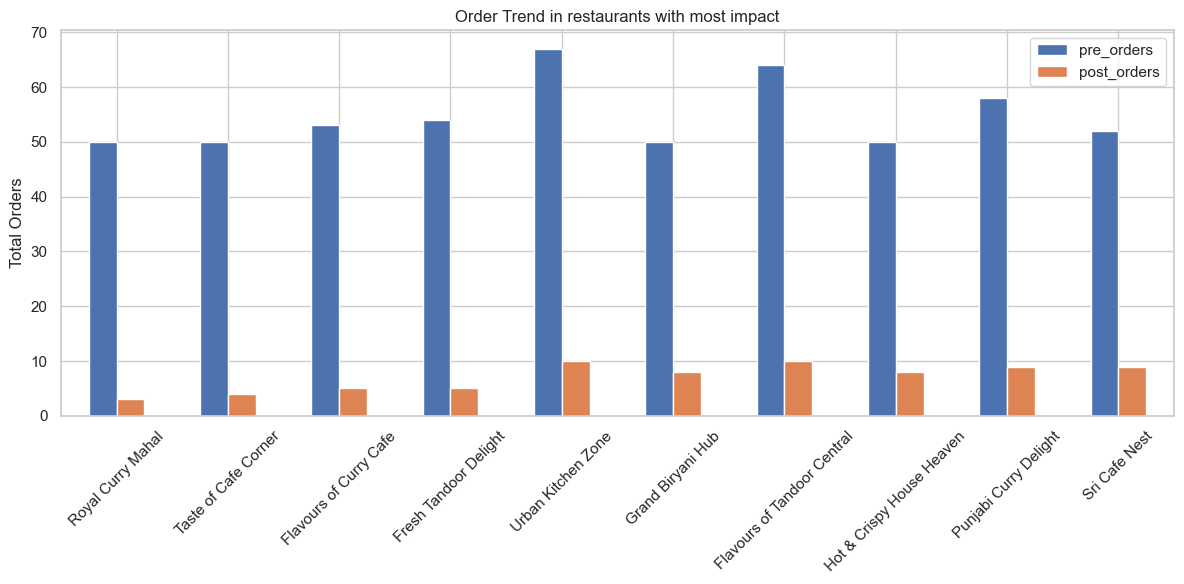

In [131]:
most_impacted_res[['pre_orders','post_orders']].plot(kind='bar',figsize=(12,6))
plt.title('Order Trend in restaurants with most impact')
plt.xlabel('')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

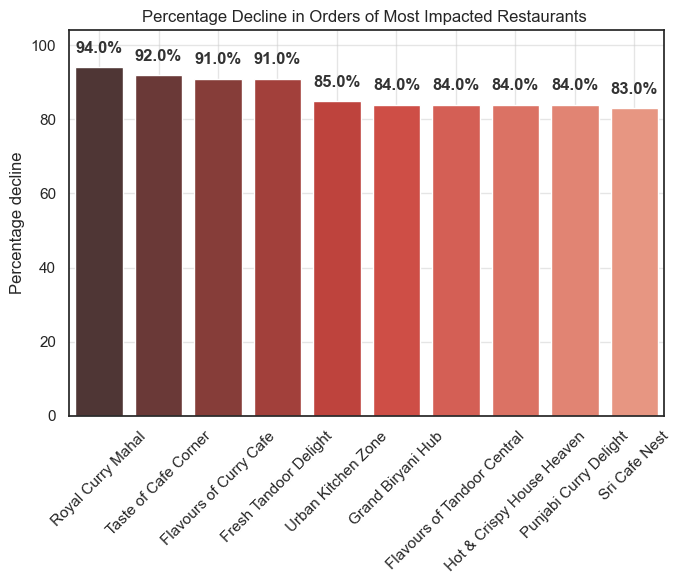

In [180]:
pal = sns.color_palette("Reds_d", n_colors=len(most_impacted_res))
pal = list(reversed(pal))


plt.figure(figsize=(7, 6))
ax = sns.barplot(data = most_impacted_res, y = 'percent_decline',x='restaurant_name',palette=pal,hue='restaurant_name')

for container in ax.containers:
    ax.bar_label(
        container, 
        label_type='edge', 
        padding=8,          # Adds space between the bar end and the text
        fontweight='bold', 
        color='#333333',     # Dark grey is often softer than pure black
        fmt='%.1f%%'
    )

plt.grid(alpha=0.5)
plt.title(f'Percentage Decline in Orders of Most Impacted Restaurants ')
plt.ylabel('Percentage decline')
plt.xlabel('')
ax.tick_params(axis='x',rotation=45)

current_max = most_impacted_res['percent_decline'].max()
plt.ylim(0, current_max + 10)

plt.tight_layout()
plt.show()